In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load dataset

In [2]:
digits = pd.read_csv('Data/train.csv')

In [3]:
X = digits.drop('label', axis=1)
y = digits['label']

A quick look at the data structure.

In [4]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The distribution of digits in  the dataset.

In [5]:
y_count = y.value_counts()
y_pct = y_count/len(y)*100
y_pct.round(2)

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

### Digit visualization

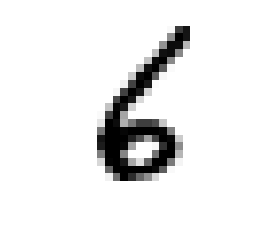

In [6]:
def digit_plot(digit):
    '''
    Plot a single digit.
    input : (1, 784) array
    '''
    digit_reshaped = digit.values.reshape(28,28)
    
    fig, ax = plt.subplots()
    ax.imshow(digit_reshaped, cmap='gray_r')
    ax.axis('off')
    
digit = X.sample(1)
digit_plot(digit)

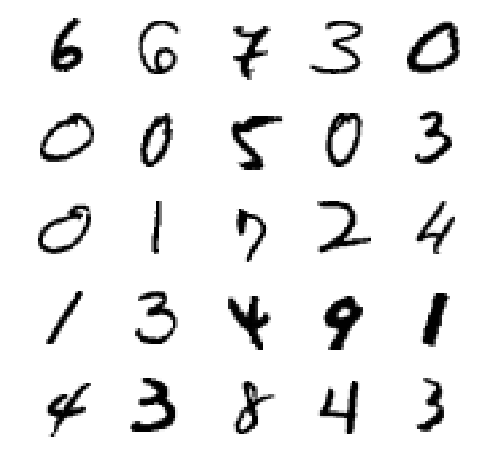

In [7]:
def digits_plot(digits):
    '''
    Plot 25 digits.
    Input : dataframe of 25 digits or (25, 784) array.
    '''
    fig, ax = plt.subplots(5,5)
    fig.set_size_inches(8,8)
    if isinstance(digits, pd.core.frame.DataFrame):
        for ax, index in zip(ax.ravel(), digits.index):
            digit = digits.loc[index, :]
            digit_reshaped = digit.values.reshape(28,28)
            ax.imshow(digit_reshaped, cmap='gray_r')
            ax.axis('off')
    else:
        for ax, digit in zip(ax.ravel(), digits):
            digit_reshaped = digit.values.reshape(28,28)
            ax.imshow(digit_reshaped, cmap='gray_r')
            ax.axis('off')

digits = X.sample(25)
digits_plot(digits)

In [8]:
def multidigits_plot(digits, size=None, shape=None, secure=True):
    '''
    Plot n digits, max 100 digits if secure=True.
    
    Input : 
    - digits : dataframe of n digits or (n, 784) array.
    - size : integer, or list or tuple of 2 integers, to set size of figure.
    - shape : shape of the axes, then shape=size, except size is set to an integer.
    - secure : if set to True, will raise an error if digits has more than 100 rows.
    '''
    n = len(digits)
    if secure and n>100:
        raise ValueError('Too much digits to plot, make sure there is maximum 100 digits to plot, or set secure to False')
    
    # find the number of rows x, and columns y, for the axes of the plot
    if shape == None:
        for i in range(1, n):
            if (i*(i-1)) <= n:
                x = i
                y = i
                if x*y >= n:
                    break
                x = i
                y = i+1
                if x*y >= n:
                    break   
    else:
        x = shape[0]
        y = shape[1]
        if not isinstance(size, int):
            size = shape
    fig, ax = plt.subplots(x, y)
    ratio = x/y
    
    # set figure size
    if size==None:
        size = 8
        fig.set_size_inches(size/ratio, size*ratio)
    if isinstance(size, int):
        fig.set_size_inches(size/ratio, size*ratio)
    if isinstance(size, (list, tuple)):
        fig.set_size_inches(size[1], size[0])
    
    axes = ax.ravel()

    # plot the digits if digits is dataframe
    if isinstance(digits, pd.core.frame.DataFrame):
        for ax, index in zip(axes, digits.index):
            digit = digits.loc[index, :]
            digit_reshaped = digit.values.reshape(28,28)
            ax.imshow(digit_reshaped, cmap='gray_r')
    
    # plot the digits if digits is a 2D array
    else:
        for ax, digit in zip(axes, digits):
            digit_reshaped = digit.values.reshape(28,28)
            ax.imshow(digit_reshaped, cmap='gray_r')
    
    # hide axis
    for ax in axes:
        ax.axis('off')

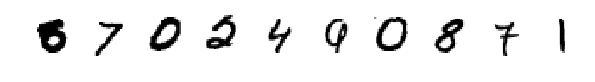

In [9]:
digits = X.sample(10)
shape = (1, 10)
multidigits_plot(digits, shape=shape)

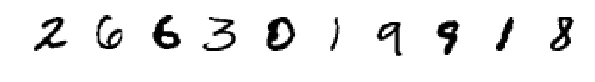

In [10]:
digits = X.sample(10)
shape = (1, 10)
multidigits_plot(digits, size=shape, shape=shape)

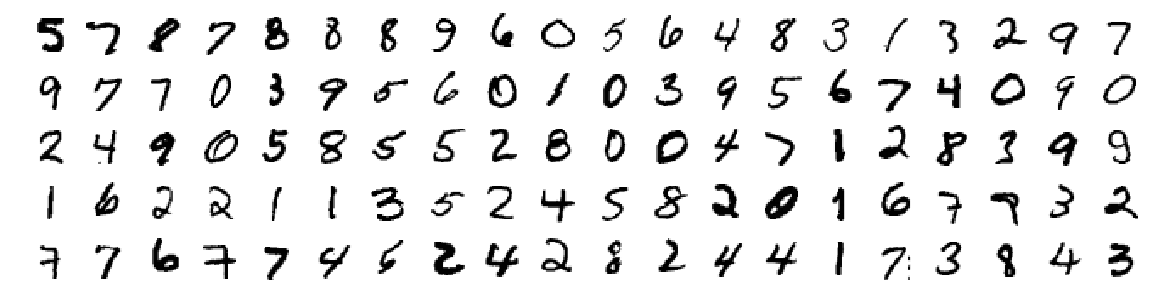

In [11]:
digits = X.sample(100)
shape = (5, 20)
multidigits_plot(digits, shape=shape)

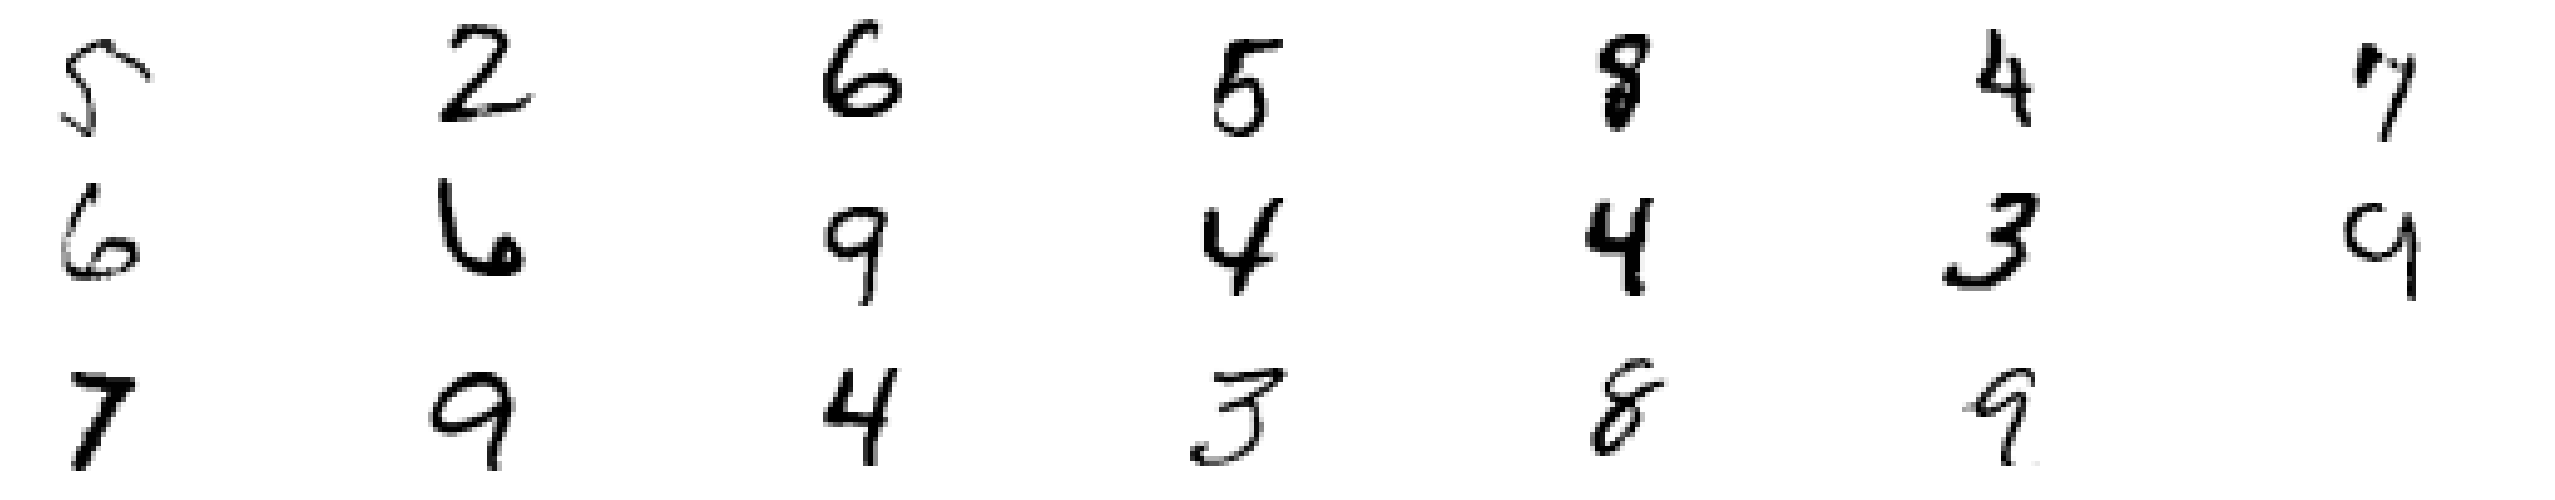

In [12]:
digits = X.sample(20)
shape = (3, 7)
multidigits_plot(digits, shape=shape, size=20)

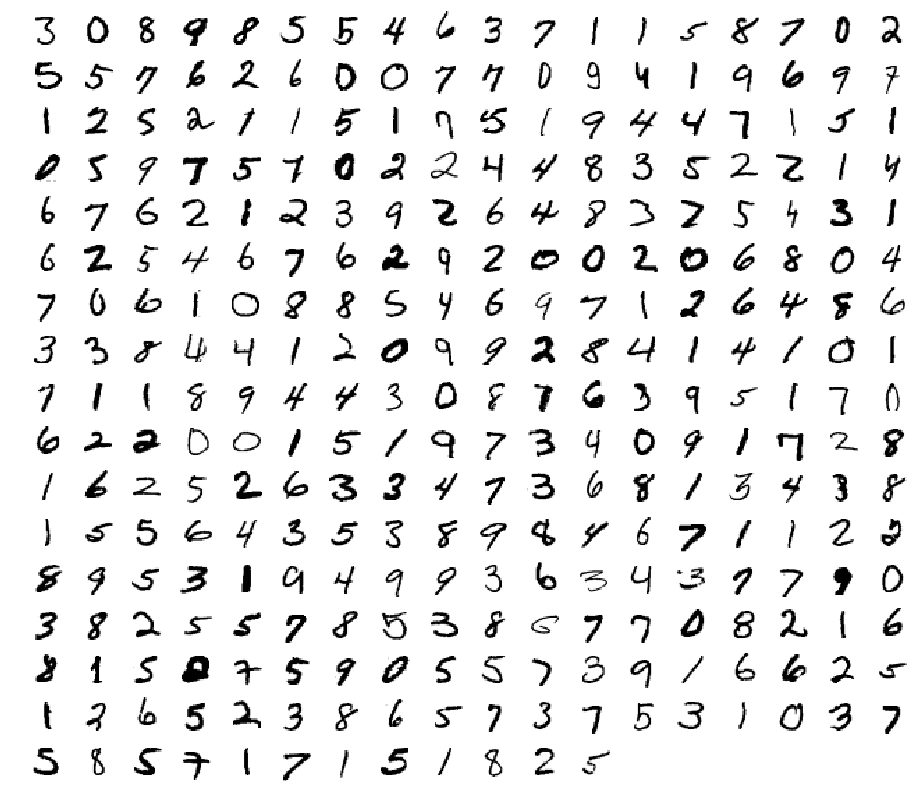

In [13]:
digits = X.sample(300)
multidigits_plot(digits, size=15, secure=False)

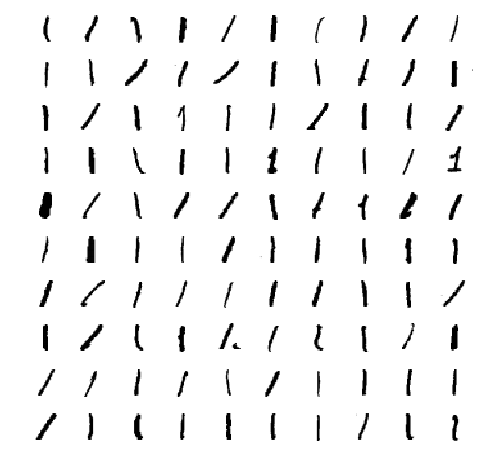

In [14]:
one = X.loc[y==1, :]

digits = one.sample(100)

multidigits_plot(digits)

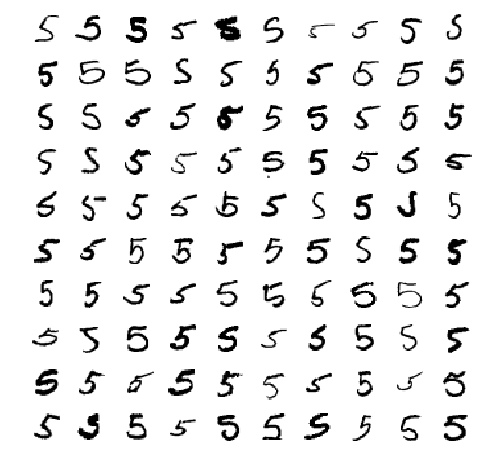

In [15]:
five = X.loc[y==5, :]

digits = five.sample(100)

multidigits_plot(digits)